# Machine Learning 
## Final project

 Team members:
+ Oscar Ochoa
+ Victor Manuel Romo
+ Luis Cabello
+ Ana Sepúlveda
+ Enrique Villar

### First ML Model

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl;
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, plot_confusion_matrix


%matplotlib inline

import os, sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import library from my src folder    
from src.helpers import identify_highly_correlated_features, one_hot, identify_low_variance_features, identify_missing_data, feature_importance_plot


In [70]:
songs_data = pd.read_pickle("../data/songs_data_final.pkl")

In [71]:
target = songs_data["genre"]
features = songs_data.drop(["genre"], axis = 1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 8888)

from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()


In [73]:
clf_tree.fit(X_train,y_train)
y_pred_dt = clf_tree.predict(X_test)
print("first five predicted values:", y_pred_dt[0:5])
print("first five actual values:", list(y_test[0:5]))

first five predicted values: [4 5 4 3 4]
first five actual values: [3, 5, 1, 3, 3]


C:\Users\oscar\AppData\Local\Temp\ipykernel_17764\3820919926.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print("first five actual values:", list(y_test[0:5]))


accuracy: 0.43


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


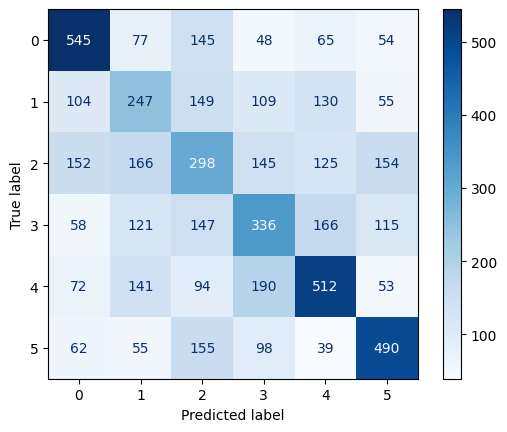

In [74]:
print("accuracy:", round(accuracy_score(y_test, y_pred_dt), 2))

# plot confusion matrix
plot_confusion_matrix(clf_tree, X_test, y_test, cmap = plt.cm.Blues);